## Used Packages

time : 시간을 알려주는 라이브러리
  
matplotlib : 시각화를 위한 그래프 라이브러리  
  
mpl_toolkits : 3차원 시각화를 위한 그래프 라이브러리

scikit-learn : 데이터 분석을 위한 라이브러리 (numpy, scipy, matplotlib 기반)
      library for data analysis

In [1]:
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import manifold, datasets

## 데이터 생성

3차원 s곡선 데이터를 생성해서 2차원 데이터로 manifold 한다.

[[ 0.44399868  1.18576054 -0.10397256]
 [ 0.89724097  0.02012739 -1.44154121]
 [ 0.8240493   0.95165239 -0.43348191]
 ..., 
 [-0.8362143   0.96021561 -1.54840282]
 [-0.55148773  1.28772807  1.834183  ]
 [ 0.99513117  1.00354626 -1.09855936]]


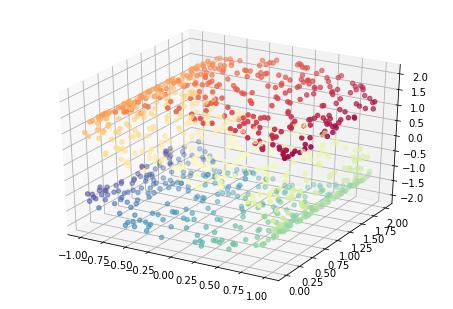

In [2]:

n_points = 1000

X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)

print(X)


fig = plt.figure()

Axes3D(fig).scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)


## locally linear embedding

n_neighbors : nearest neighbor 수

n_components : 출력 차원

LLE: 0.22 sec


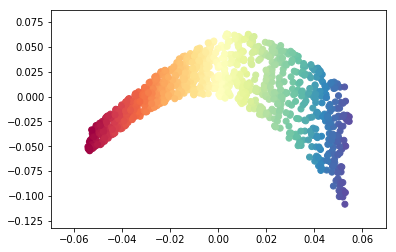

In [3]:

n_neighbors = 10
n_components = 2

t0 = time()

Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components).fit_transform(X)

t1 = time()

print("LLE: %.2g sec" % (t1 - t0))

plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)


## IsoMap

n_neighbors : nearest neighbor 수

n_components : 출력 차원

Isomap: 0.52 sec


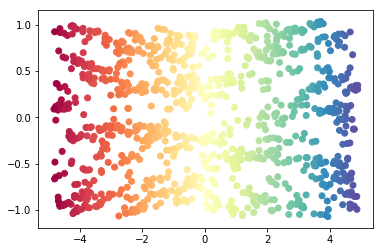

In [4]:
n_neighbors = 10
n_components = 2

t0 = time()

Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)

t1 = time()

print("Isomap: %.2g sec" % (t1 - t0))

plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)



## t-SNE 

n_components : 출력 차원
    
init : string or numpy array, optional (default: “random”)

    Initialization of embedding. Possible options are ‘random’, ‘pca’, and a numpy array of shape (n_samples, n_components). PCA initialization cannot be used with precomputed distances and is usually more globally stable than random initialization.
       

t-SNE: 19 sec


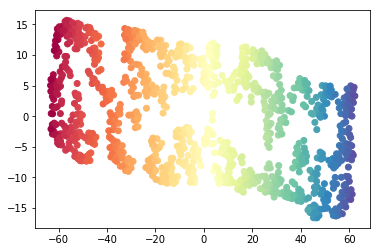

In [5]:


n_components = 2

t0 = time()

Y = manifold.TSNE(n_components=n_components, init='pca', random_state=0).fit_transform(X)

t1 = time()

print("t-SNE: %.2g sec" % (t1 - t0))

plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)


## Used Packages

matplotlib : 시각화를 위한 그래프 라이브러리

numpy(numerical python) : 선형대수(배열,행렬) 연산에 효과적인 라이브러리

scipy : 

scikit-learn : 데이터 분석을 위한 라이브러리 (numpy, scipy, matplotlib 기반)
     

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.neighbors import KernelDensity

## Available Kernels

Text(0.5,1,'Available Kernels')

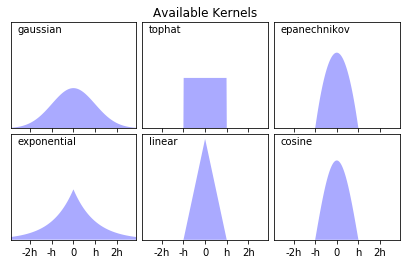

In [3]:

X_plot = np.linspace(-6, 6, 1000)[:, None]
X_src = np.zeros((1, 1))

fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
fig.subplots_adjust(left=0.05, right=0.95, hspace=0.05, wspace=0.05)


def format_func(x, loc):
    if x == 0:
        return '0'
    elif x == 1:
        return 'h'
    elif x == -1:
        return '-h'
    else:
        return '%ih' % x

for i, kernel in enumerate(['gaussian', 'tophat', 'epanechnikov',
                            'exponential', 'linear', 'cosine']):
    axi = ax.ravel()[i]
    log_dens = KernelDensity(kernel=kernel).fit(X_src).score_samples(X_plot)
    axi.fill(X_plot[:, 0], np.exp(log_dens), '-k', fc='#AAAAFF')
    axi.text(-2.6, 0.95, kernel)

    axi.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
    axi.xaxis.set_major_locator(plt.MultipleLocator(1))
    axi.yaxis.set_major_locator(plt.NullLocator())

    axi.set_ylim(0, 1.05)
    axi.set_xlim(-2.9, 2.9)

ax[0, 1].set_title('Available Kernels')

## Kernel Density Estimation



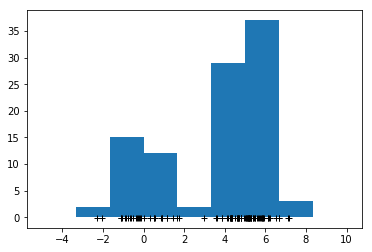

In [4]:
# data generation

N = 100
np.random.seed(1)

X = np.concatenate((np.random.normal(0, 1, int(0.3 * N)),np.random.normal(5, 1, int(0.7 * N))))[:, np.newaxis]

X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

bins = np.linspace(-5, 10, 10)


plt.hist(X, bins=bins)
plt.plot(X, np.zeros(X.shape[0]) - 0.1, '+k')

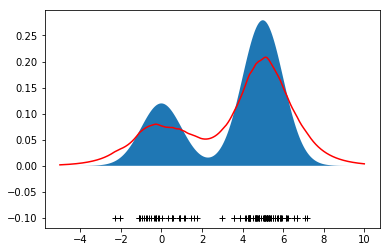

In [7]:

# true density graph
true_dens = (0.3 * norm(0, 1).pdf(X_plot[:, 0]) + 0.7 * norm(5, 1).pdf(X_plot[:, 0]))
plt.fill(X_plot[:, 0], true_dens)
plt.plot(X, np.zeros(X.shape[0]) - 0.1, '+k')


#------------------------------------------------------------ 
# kernal density graph
kde = KernelDensity(kernel='exponential', bandwidth=0.5).fit(X)
log_dens = kde.score_samples(X_plot)

plt.plot(X_plot[:, 0], np.exp(log_dens), '-',c = 'r')


